STATISTIC PROJECT 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('../dataset/customer_behavior.csv')
df.head()

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup
0,1001,Male,South,256.07,Fashion,No,A
1,1002,Female,South,NaN,Electronics,Yes,B
2,1003,Female,West,1194.41,Fashion,No,A
3,1004,Female,South,413.06,Grocery,No,A
4,1005,Male,West,1556.32,Fashion,Yes,A


1. What is the average, median, and mode of PurchaseAmount?

In [9]:
df["PurchaseAmount"].median()



np.float64(998.0799999999999)

In [10]:
df["PurchaseAmount"].mean()

np.float64(1003.9506701030928)

In [14]:
df["PurchaseAmount"].mode()[0]

np.float64(0.0)

2. Are there any outliers in the PurchaseAmount data?

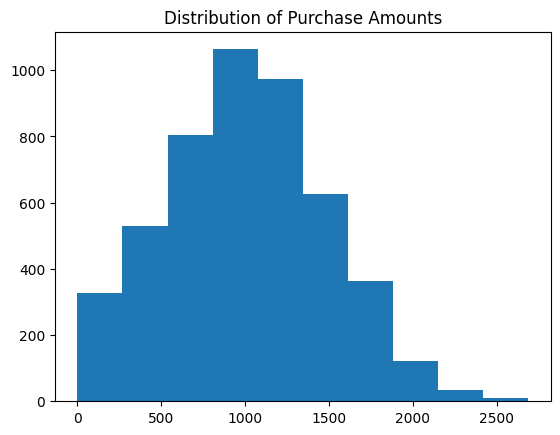

In [17]:
plt.hist(df["PurchaseAmount"])
plt.title('Distribution of Purchase Amounts')
plt.show()

<Axes: ylabel='PurchaseAmount'>

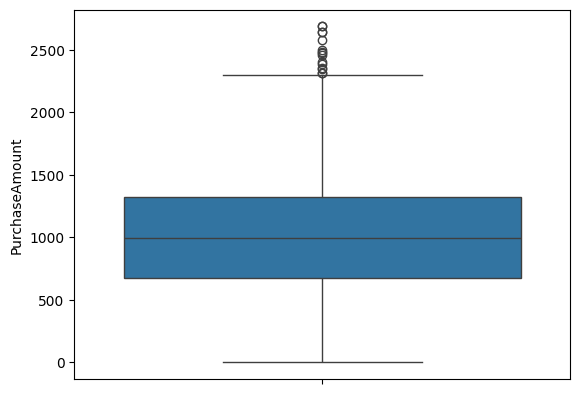

In [19]:
sns.boxplot(df["PurchaseAmount"])

In [ ]:
data=sorted(df["PurchaseAmount"])


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.58,
 13.96,
 33.97,
 46.88,
 53.98,
 58.74,
 59.86,
 62.55,
 65.13,
 115.93,
 121.57,
 173.88,
 188.51,
 191.41,
 219.91,
 234.86,
 240.05,
 256.07,
 nan,
 0.0,
 142.15,
 256.31,
 257.7,
 261.67,
 276.75,
 278.04,
 292.24,
 293.96,
 325.2,
 331.16,
 365.51,
 366.68,
 371.72,
 385.25,
 393.27,
 409.88,
 413.06,
 413.18,
 414.03,
 421.29,
 434.47,
 435.83,
 438.06,
 456.05,
 464.67,
 466.14,
 471.94,
 482.02,
 487.39,
 488.12,
 492.92,
 495.95,
 497.96,
 503.04,
 505.17,
 506.07,
 506.48,
 507.13,
 517.55,
 518.3,
 518.93,
 523.42,
 526.72,
 526.75,
 529.3,
 539.09,
 545.75,
 546.89,
 555.57,
 567.86,
 570.3,
 577.16,
 590.33,
 607.92,
 609.93,
 613.11,
 619.03,
 623.4,
 624.64,
 624.99,
 632.92,
 645.61,
 647.12,
 647.44,
 655.44,
 656.7,
 657.88,
 660.51,
 672.62,
 683.21,
 684.98,
 710.51,
 718.46,
 720.42,
 720.6,
 727.85,
 728.29,
 733.93,
 736.17,
 736.76,
 740.68,
 744.7,
 747.79,
 751.48,
 759.71,
 760.14,
 764.62,
 764.87,
 767.46,
 769.85,

In [22]:
q1,q3=np.percentile(data,[25,75])
print(q1,q3)

nan nan


In [25]:
df["PurchaseAmount"].isnull().sum()

np.int64(150)

In [26]:
df[df.duplicated()]

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup


In [27]:
df1=df.dropna()
df1.isnull().sum()

CustomerID         0
Gender             0
Region             0
PurchaseAmount     0
ProductCategory    0
Churn              0
CampaignGroup      0
dtype: int64

In [29]:
df["PurchaseAmount"]=df["PurchaseAmount"].fillna(df["PurchaseAmount"].mean())

In [30]:
df.isnull().sum()

CustomerID           0
Gender              97
Region             175
PurchaseAmount       0
ProductCategory    526
Churn              265
CampaignGroup      185
dtype: int64

In [ ]:
data=sorted(df["PurchaseAmount"])

In [32]:
q1,q3=np.percentile(data,[25,75])
print(q1,q3)

686.395 1316.155


In [33]:
q1,q2,q3=np.percentile(data,[25,50,75])
print("Q1=",q1)
print("Q2= ",q2)
print("Q3=",q3)

Q1= 686.395
Q2=  1003.9506701030928
Q3= 1316.155


In [34]:
iqr=q3-q1
print("IQR= ",iqr)


IQR=  629.76


In [35]:
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print("Lower Bound=",lower_bound)
print("Upper Bound=",upper_bound)

Lower Bound= -258.245
Upper Bound= 2260.795


In [38]:
np.where(df["PurchaseAmount"]<lower_bound)

(array([], dtype=int64),)

In [39]:
np.where(df["PurchaseAmount"]>upper_bound)

(array([ 195,  265,  348,  411,  442,  702,  826, 1358, 1792, 2285, 2455,
        2557, 2681, 3326, 3438, 3564, 3697, 3711, 4005, 4088, 4270, 4345,
        4693, 4808]),)

There is no outliers in lower bound and there are outliers in upper bound

3. Is there any skewness or kurtosis in the PurchaseAmount distribution?

In [43]:
from scipy.stats import skew
skew(df['PurchaseAmount'])


np.float64(0.10768667914138372)

In [42]:
df['PurchaseAmount'].kurtosis()

np.float64(-0.1767892397108457)

Skewness > 0: right‑skewed , 
Kurtosis < 0: lighter tails.

<Axes: xlabel='PurchaseAmount', ylabel='Count'>

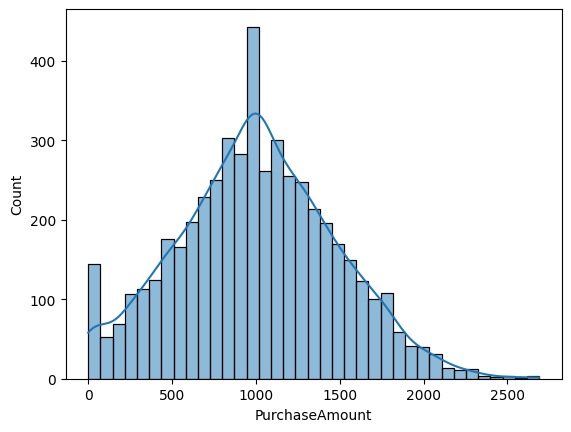

In [46]:
sns.histplot(df['PurchaseAmount'], kde=True)

4. Is there a significant difference in spending between male and female
customers?

In [47]:
df.head()

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup
0,1001,Male,South,256.07000,Fashion,No,A
1,1002,Female,South,1003.95067,Electronics,Yes,B
2,1003,Female,West,1194.41000,Fashion,No,A
3,1004,Female,South,413.06000,Grocery,No,A
4,1005,Male,West,1556.32000,Fashion,Yes,A


In [54]:
from scipy import stats

In [48]:
df["Gender"].value_counts()

Gender
Male      2458
Female    2445
Name: count, dtype: int64

* h0=There is no significant difference in average spending between male and female customers.
* h1=There is a significant difference in average spending between male and female customers.

In [49]:
alpha=0.05

In [50]:
male=df[df["Gender"]=='Male']["PurchaseAmount"]
female=df[df["Gender"]=='Female']["PurchaseAmount"] 

In [51]:
print("Average Purchase Amount for Males:", male.mean())
print("Average Purchase Amount for Females:", female.mean())

Average Purchase Amount for Males: 1018.7306095392281
Average Purchase Amount for Females: 988.3652557291338


In [57]:
t_stat, p_val=stats.ttest_ind(male, female) 
print("T-statistic:", t_stat) 
print("P-value:", p_val)

T-statistic: 2.2348211560386244
P-value: 0.025473983985623807


In [59]:
if p_val < alpha:
    print(" There is a significant difference in average purchase amounts between males and females.")
else:
    print(" No significant difference in average purchase amounts between males and females.")


 There is a significant difference in average purchase amounts between males and females.


5. Is there a relationship between ProductCategory and customer churn?

In [61]:
df["ProductCategory"]
df["ProductCategory"].value_counts()

ProductCategory
Grocery        1548
Fashion        1523
Electronics    1403
Name: count, dtype: int64

In [63]:
df["Churn"]
df["Churn"].value_counts()

Churn
No     2792
Yes    1943
Name: count, dtype: int64

In [64]:
#Chi-square test
contingency=pd.crosstab(df["ProductCategory"], df["Churn"])
print(contingency)

Churn             No  Yes
ProductCategory          
Electronics      785  541
Fashion          839  607
Grocery          855  604


In [65]:
chi2, p_value, dof, expected=stats.chi2_contingency(contingency)
print("Chi-square Statistic:", chi2)    
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

Chi-square Statistic: 0.3960436652673918
P-value: 0.8203519424988512
Degrees of Freedom: 2


In [66]:
if p_value < 0.05: 
    print("\nConclusion: There IS a significant relationship between ProductCategory and Churn.")
else: 
    print("\nConclusion: There is NO significant relationship between ProductCategory and Churn.")


Conclusion: There is NO significant relationship between ProductCategory and Churn.


6. Does PurchaseAmount vary significantly across different regions?

In [77]:
region_groups = [group["PurchaseAmount"].values for name, group in df.groupby("Region")]
f_static, p_v=stats.f_oneway(*region_groups)
print("F-statistic:", f_static)
print("P-value:", p_v)

F-statistic: 0.38969678855129
P-value: 0.760431789221896


In [78]:
if p_v < alpha:
    print("\nConclusion: PurchaseAmount DOES vary significantly across different regions.")
else:
    print("\nConclusion: PurchaseAmount does NOT vary significantly across different regions.")


Conclusion: PurchaseAmount does NOT vary significantly across different regions.


In [79]:
df.groupby("Region")["PurchaseAmount"].mean()

Region
East     1009.794422
North    1012.688505
South     997.837813
West      995.438190
Name: PurchaseAmount, dtype: float64

7. Which email campaign (A or B) performed better in terms of average
PurchaseAmount?

In [81]:
A=df[df["CampaignGroup"] == "A"]['PurchaseAmount']
B=df[df["CampaignGroup"] == "B"]['PurchaseAmount']

In [82]:
print(df.groupby('CampaignGroup')['PurchaseAmount'].mean())

CampaignGroup
A    1011.663336
B     994.586394
Name: PurchaseAmount, dtype: float64


In [83]:
t_stat, p_value = stats.ttest_ind(A, B, equal_var=False)
print("T-statistic:", t_stat) 
print("P-value:", p_value)

T-statistic: 1.2435062313519185
P-value: 0.21374202630902686


In [84]:
if p_value < 0.05: 
    print("\nConclusion: There IS a significant difference between Campaign A and B.") 
else: 
    print("\nConclusion: There is NO significant difference between Campaign A and B.")


Conclusion: There is NO significant difference between Campaign A and B.


8. Can we assume PurchaseAmount follows a normal distribution?

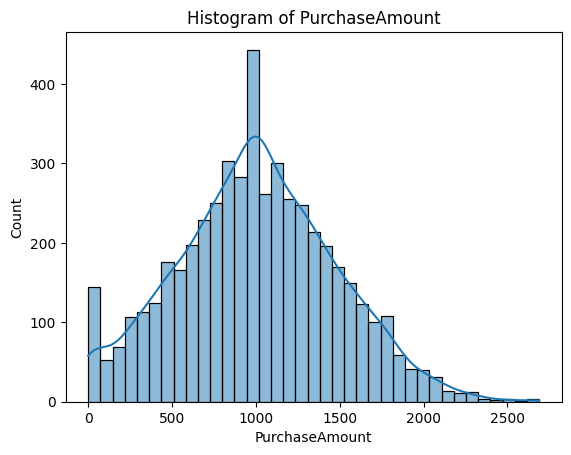

In [85]:
sns.histplot(df['PurchaseAmount'], kde=True)
plt.title("Histogram of PurchaseAmount")
plt.show()

Based on the histogram, we cannot confidently assume that PurchaseAmount follows a normal distribution. The data shows right skewness and tail deviations, which violate the assumptions of normality.

9. What insights can we gain by applying the Central Limit Theorem?

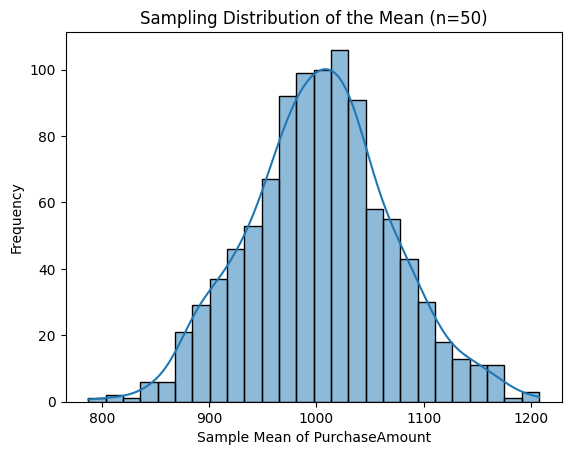

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sample_means = []
for _ in range(1000):
    sample = df['PurchaseAmount'].sample(n=50, replace=True)
    sample_means.append(sample.mean())

# Plot the sampling distribution
sns.histplot(sample_means, kde=True)
plt.title("Sampling Distribution of the Mean (n=50)")
plt.xlabel("Sample Mean of PurchaseAmount")
plt.ylabel("Frequency")
plt.show()


By applying the Central Limit Theorem, we observe that the distribution of sample means for PurchaseAmount becomes approximately normal, even though the original data is skewed. This allows us to use statistical tests, construct confidence intervals, and make reliable inferences about customer spending behavior.

10. What is the 95% confidence interval for the average PurchaseAmount?

The interval represents the range within which the true population mean is likely to fall with 95% confidence.

95% Confidence Interval = (lower_value, upper_value)

This means we are 95% confident that the true average PurchaseAmount of all customers lies within this range.